In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("USArrest.csv")

In [6]:
df

,State,Murder,Assault,UrbanPop,Rape
0,Virginia,18.3,375,89,11.1
1,Arkansas,17.6,67,58,12.1
2,Texas,17.8,326,66,39.1
3,Alaska,18.9,64,89,25.8
4,Maine,9.3,233,94,40.0
5,Indiana,3.4,224,54,36.7
6,New Jersey,14.6,338,71,14.4
7,Kentucky,13.0,228,55,47.4
8,Georgia,18.9,193,85,37.3
9,Arizona,19.8,367,57,35.4


In [8]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Virginia,18.3,375,89,11.1
1,Arkansas,17.6,67,58,12.1
2,Texas,17.8,326,66,39.1
3,Alaska,18.9,64,89,25.8
4,Maine,9.3,233,94,40.0


In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Virginia,18.3,375,89,11.1
1,Arkansas,17.6,67,58,12.1
2,Texas,17.8,326,66,39.1
3,Alaska,18.9,64,89,25.8
4,Maine,9.3,233,94,40.0


In [11]:
df.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,13.668,4.957593,2.2,9.350,15.1,17.875,19.8
Assault,50.0,242.480,101.498214,50.0,170.250,247.0,332.000,396.0
UrbanPop,50.0,72.740,17.704848,40.0,59.000,72.0,89.000,99.0
Rape,50.0,32.040,11.791799,11.0,24.225,35.2,40.600,49.3


array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

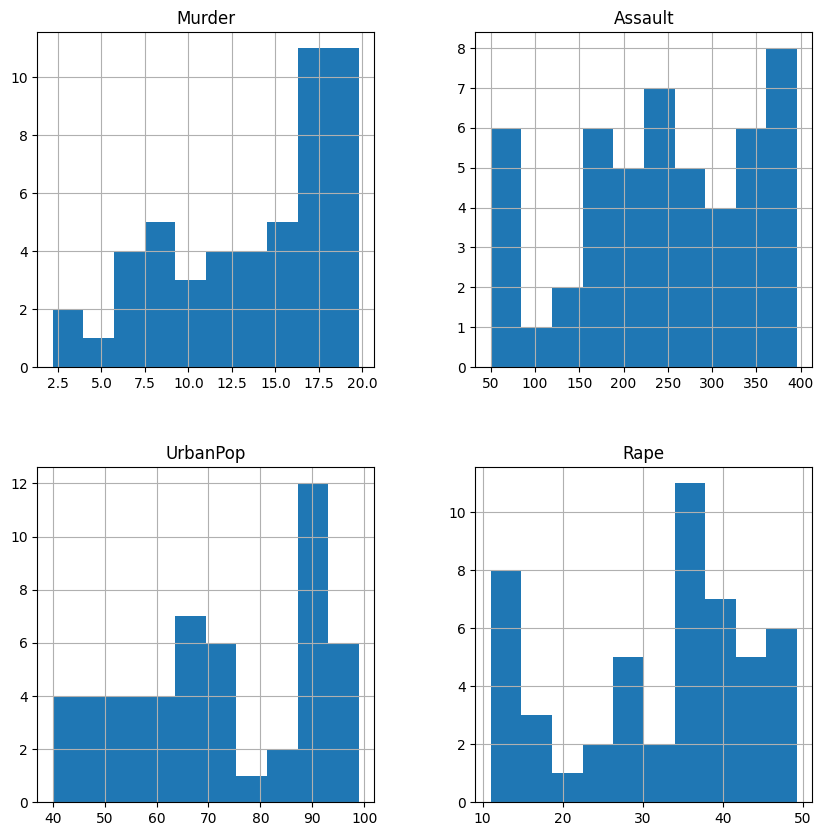

In [14]:
df.hist(figsize = (10,10))

## Model ve Görselleştirme

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [16]:
df_numeric = df.select_dtypes(include=[float, int])
k_fit = kmeans.fit(df_numeric)

In [17]:
k_fit

KMeans(n_clusters=4)

In [18]:
k_fit.n_clusters

4

In [19]:
k_fit.cluster_centers_

array([[ 12.77142857,  68.        ,  82.57142857,  24.01428571],
       [ 13.6       , 260.35714286,  67.21428571,  39.07857143],
       [ 13.62307692, 177.38461538,  74.53846154,  35.20769231],
       [ 14.15625   , 356.0625    ,  71.8125    ,  26.81875   ]])

In [20]:
k_fit.labels_

array([3, 0, 3, 0, 1, 1, 3, 1, 2, 3, 0, 0, 1, 1, 0, 1, 1, 3, 3, 3, 2, 1,
       2, 3, 3, 3, 2, 3, 2, 3, 2, 0, 3, 1, 2, 1, 2, 2, 2, 1, 1, 3, 2, 2,
       0, 2, 3, 3, 1, 1], dtype=int32)

In [21]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df_numeric)

In [22]:
kumeler = k_fit.labels_

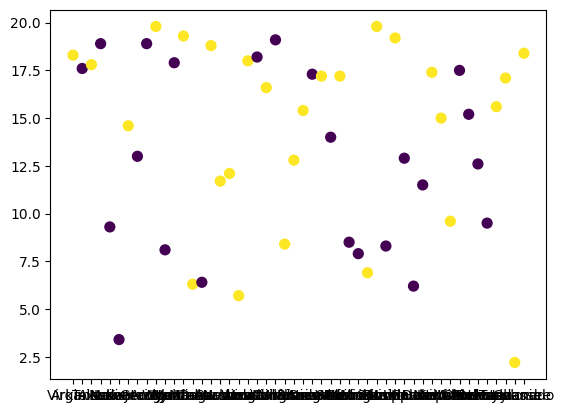

In [23]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c = kumeler,s = 50,cmap = "viridis")


In [24]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df_numeric)
kumeler = k_fit.labels_

In [49]:
df["kume_no"] = kumeler

df.head()

,State,Murder,Assault,UrbanPop,Rape,kume_no
0,Virginia,18.3,375,89,11.1,0
1,Arkansas,17.6,67,58,12.1,1
2,Texas,17.8,326,66,39.1,0
3,Alaska,18.9,64,89,25.8,1
4,Maine,9.3,233,94,40.0,1


In [52]:
df["kume_no"] = df["kume_no"] + 1
df.head()

,State,Murder,Assault,UrbanPop,Rape,kume_no
0,Virginia,18.3,375,89,11.1,1
1,Arkansas,17.6,67,58,12.1,2
2,Texas,17.8,326,66,39.1,1
3,Alaska,18.9,64,89,25.8,2
4,Maine,9.3,233,94,40.0,2


In [4]:
df = pd.read_csv("USArrest.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
# del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Virginia,18.3,375,89,11.1
Arkansas,17.6,67,58,12.1
Texas,17.8,326,66,39.1
Alaska,18.9,64,89,25.8
Maine,9.3,233,94,40.0


In [5]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df,"complete")
hc_average = linkage(df,"average")
hc_single = linkage(df,"single")

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [12.5, 12.5, 51.25, 51.25],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [90.0, 90.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [105.0, 105.0, 160.0, 160.0],
  [31.875, 31.875, 132.5, 132.5],
  [185.0, 185.0, 195.0, 195.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [190.0, 190.0, 213.75, 213.75],
  [245.0, 245.0, 255.0, 255.0],
  [201.875, 201.875, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [312.5, 312.5, 342.5, 342.5],
  [295.0, 295.0, 327.5, 

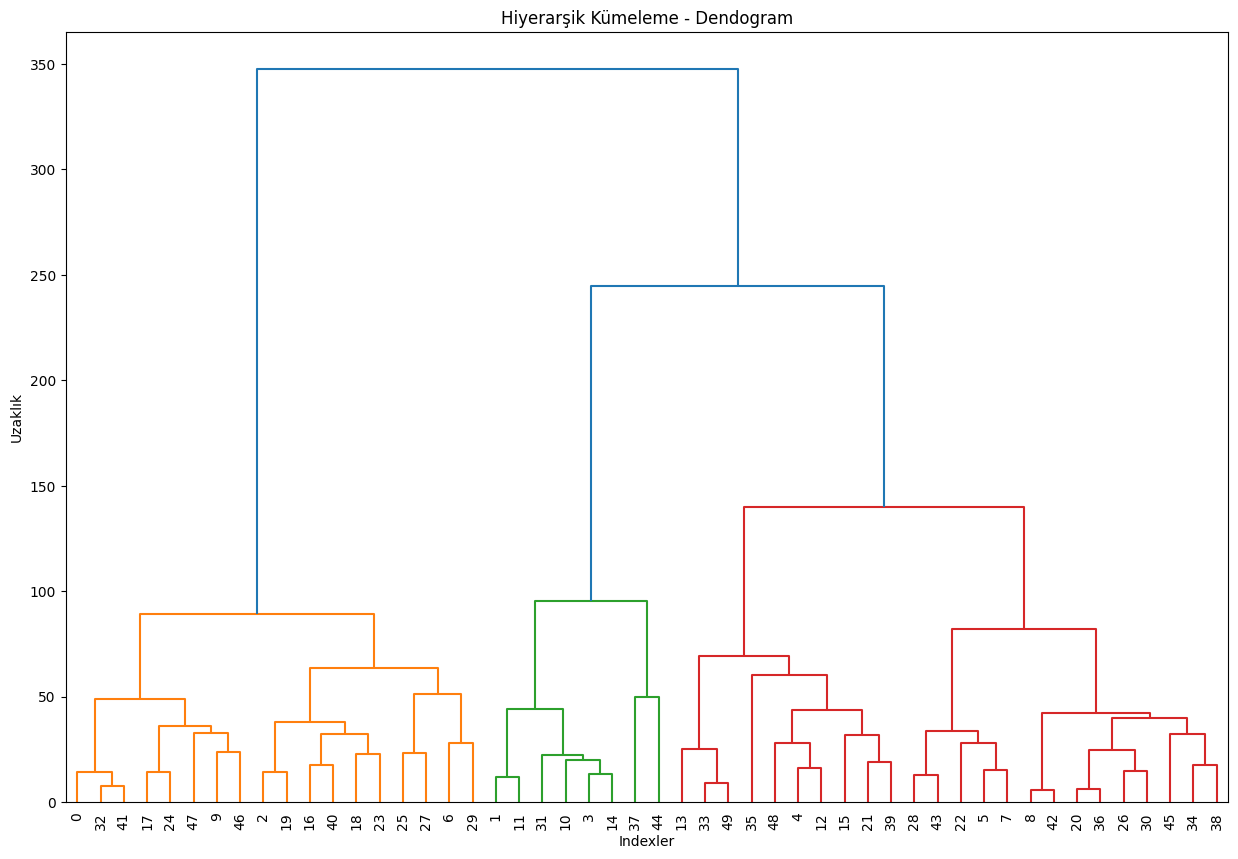

In [6]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklık")
dendrogram(hc_complete,leaf_font_size=10)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [52.5, 52.5, 96.25, 96.25],
  [13.75, 13.75, 74.375, 74.375]],
 'dcoord': [[0.0,
   np.float64(51.32640645905381),
   np.float64(51.32640645905381),
   0.0],
  [0.0,
   np.float64(63.698508616764336),
   np.float64(63.698508616764336),
   np.float64(51.32640645905381)],
  [0.0,
   np.float64(89.0466170048026),
   np.float64(89.0466170048026),
   np.float64(63.698508616764336)],
  [0.0, np.float64(49.863513714939906), np.float64(49.863513714939906), 0.0],
  [0.0,
   np.float64(95.38369881693622),
   np.float64(95.38369881693622),
   np.float64(49.863513714939906)],
  [0.0, np.float64(60.42863559604834), np.float64(60.42863559604834), 0.0],
  [0.0,
   np.float64(69.12430831480341),
   np.float64(69.12430831480341),
   np.flo

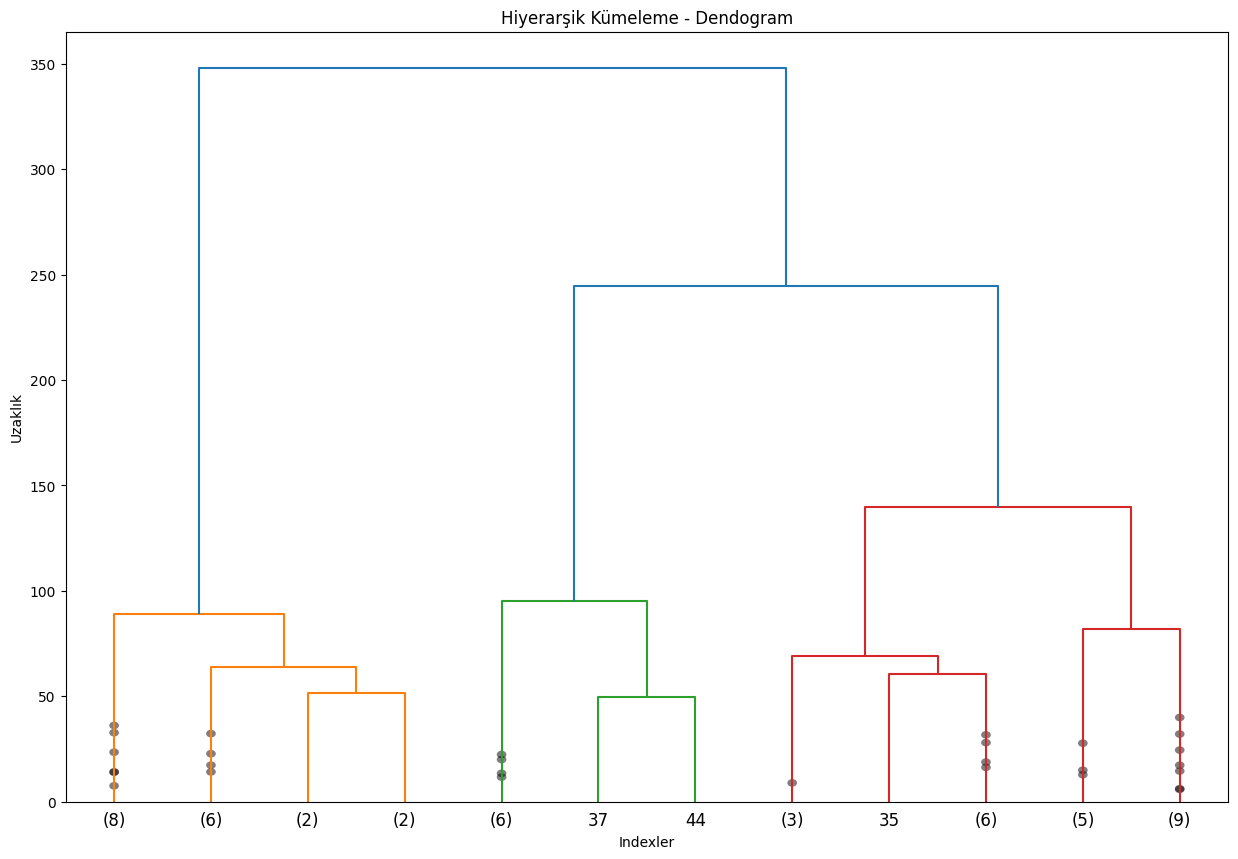

In [7]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklık")
dendrogram(hc_complete,truncate_mode= "lastp",p=12,show_contracted=True)

## Optimum Küme Sayısı

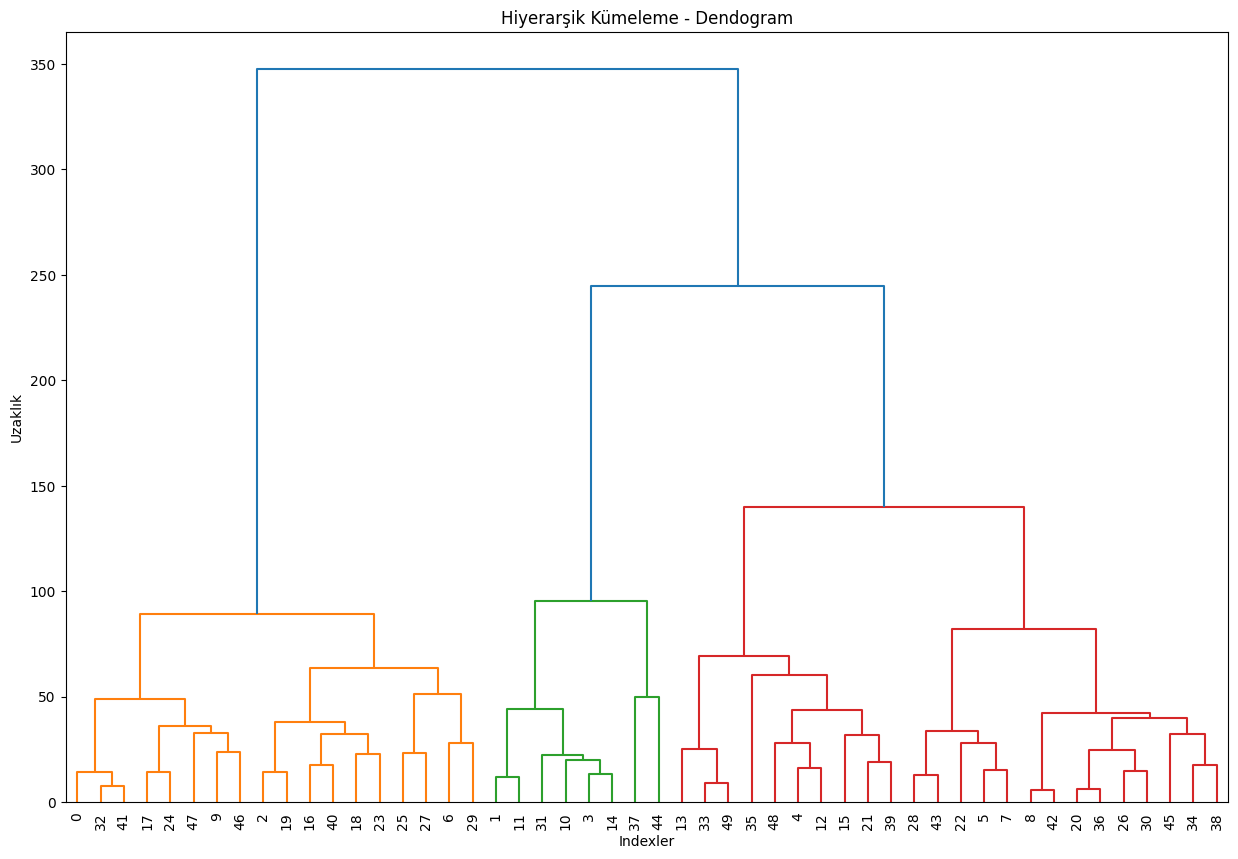

In [8]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklık")
den = dendrogram(hc_complete,leaf_font_size=10)

In [11]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4,metric="euclidean",linkage="ward")

cluster.fit_predict(df)

array([0, 2, 0, 2, 1, 1, 0, 1, 3, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 3, 1,
       1, 0, 0, 0, 3, 0, 1, 0, 3, 2, 0, 1, 3, 1, 3, 3, 3, 1, 0, 0, 3, 1,
       2, 3, 0, 0, 1, 1])

In [12]:
df["kume_no"] = cluster.fit_predict(df)

In [13]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
State,,,,,
Virginia,18.3,375,89,11.1,0
Arkansas,17.6,67,58,12.1,2
Texas,17.8,326,66,39.1,0
Alaska,18.9,64,89,25.8,2
Maine,9.3,233,94,40.0,1


In [14]:
df = pd.read_csv("USArrest.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
# del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Virginia,18.3,375,89,11.1
Arkansas,17.6,67,58,12.1
Texas,17.8,326,66,39.1
Alaska,18.9,64,89,25.8
Maine,9.3,233,94,40.0


In [16]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 0.94381011,  1.3188943 ,  0.92771656, -1.79383941],
       [ 0.80117904, -1.74645013, -0.84099275, -1.70817373],
       [ 0.84193078,  0.83122587, -0.38455164,  0.60479972],
       [ 1.0660653 , -1.77630738,  0.92771656, -0.53455386],
       [-0.89001782, -0.09434891,  1.21299225,  0.68189884]])

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [26]:
bilesen_df = pd.DataFrame(data = pca_fit,columns = ["birinci_bilesen","ikinci_bilesen","ucuncu_bilesen"])

In [27]:
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.011284,-2.493948,-0.542158
1,-0.811631,-0.709163,-0.131295
2,1.265484,-0.232654,0.453686
3,-1.414939,-0.683091,1.356031
4,-0.912116,0.576870,0.281978


In [28]:
pca.explained_variance_ratio_

array([0.32296477, 0.27117437, 0.22425894])

In [29]:
pca = PCA().fit(df)

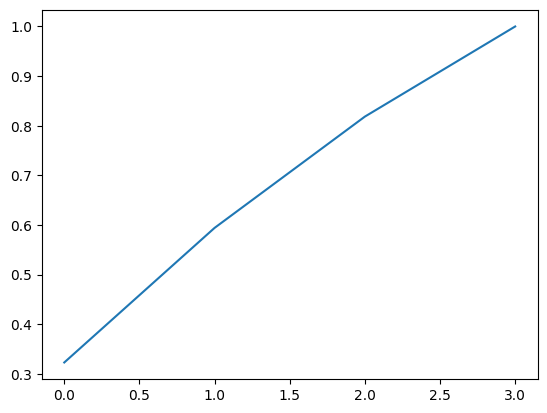

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))